In [89]:
import pandas as pd
import numpy as np

In [90]:
df = pd.read_csv('AB_NYC_2019.csv')

In [91]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [93]:
df.select_dtypes(exclude='number').head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,2018-10-19
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19


In [94]:
df.select_dtypes(include='number').head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,3647,4632,40.80902,-73.94190,150,3,0,NaN,1,365
3,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0


# Limpar dados

In [95]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [96]:
df.count()

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [97]:
df.isnull().sum().sum()

20141

In [98]:
df.isnull().mean()

id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [99]:
df = df.fillna(0)

# Perguntas(invente perguntas depois de limpar os dados e responda-as!!):

Quais são os bairros registrados (neighbourhood_group)
Quais são os lugares registrados
Bairro com maior número de quartos alugados
Lugar com maior média de avaliações
Bairro com maior quantidade de noites
Bairro mais barato
Bairro mais caro
Tipos de quartos mais bem avaliados

In [100]:
#Quais são os bairros registrados (neighbourhood_group)
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [101]:
#Quais são os lugares registrados 
df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [102]:
len(df['neighbourhood'].unique())

221

In [103]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

<AxesSubplot:xlabel='neighbourhood_group'>

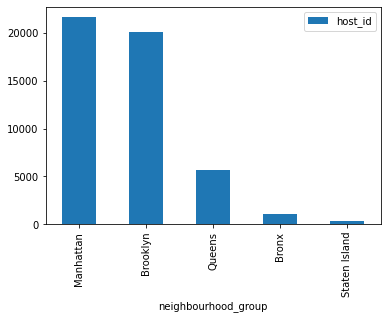

In [104]:
#Bairro com maior número de quartos alugados
df[['neighbourhood_group', 'host_id']].groupby(by='neighbourhood_group').count().sort_values(by='host_id', ascending=False).head().plot(kind='bar')

In [105]:
df.groupby(by='neighbourhood').count().sort_values(by= 'host_id', ascending=False).head()

,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,,,,,,,
Williamsburg,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920
Bedford-Stuyvesant,3714,3714,3714,3714,3714,3714,3714,3714,3714,3714,3714,3714,3714,3714,3714
Harlem,2658,2658,2658,2658,2658,2658,2658,2658,2658,2658,2658,2658,2658,2658,2658
Bushwick,2465,2465,2465,2465,2465,2465,2465,2465,2465,2465,2465,2465,2465,2465,2465
Upper West Side,1971,1971,1971,1971,1971,1971,1971,1971,1971,1971,1971,1971,1971,1971,1971


<AxesSubplot:xlabel='neighbourhood'>

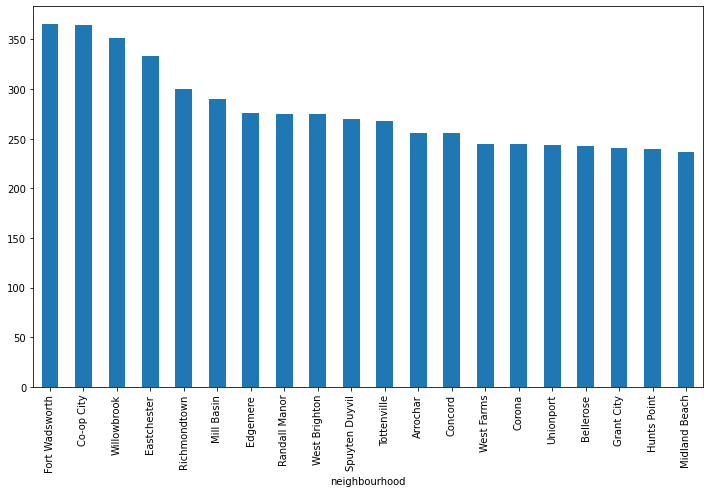

In [106]:
#Lugar com maior média de avaliações 
df.groupby(by='neighbourhood').mean().sort_values(by= 'availability_365', ascending=False).iloc[:,-1].head(20).plot(kind='bar',figsize=(12,7))

In [107]:
#Bairro com maior quantidade de noites
df.groupby(by='neighbourhood_group').count().sort_values(by='minimum_nights', ascending = False).loc[:,'minimum_nights'].head(1)

neighbourhood_group
Manhattan    21661
Name: minimum_nights, dtype: int64

In [108]:
#Bairro mais caro
df.groupby(by='neighbourhood_group').mean().sort_values(by='price', ascending=False).loc[:,'price'].head(1)

neighbourhood_group
Manhattan    196.875814
Name: price, dtype: float64

<AxesSubplot:xlabel='neighbourhood_group'>

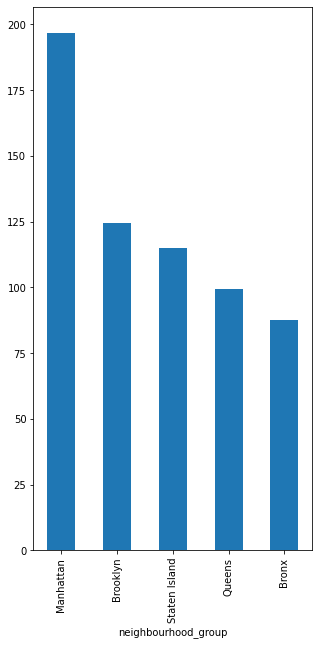

In [109]:
#Bairro mais barato
df.groupby(by='neighbourhood_group').mean().sort_values(by='price', ascending=False).loc[:,'price'].plot(kind='bar', figsize=(5,10))

<AxesSubplot:xlabel='room_type'>

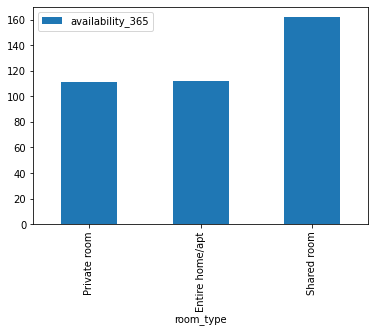

In [110]:
#Tipos de quartos mais bem avaliados
df[['room_type', 'availability_365']].groupby(by='room_type').mean().sort_values(by='availability_365').plot(kind='bar')